In [13]:
import pandas as pd

# Carga el archivo
df = pd.read_csv('json/LAROUSSE 341.txt', sep='|', encoding='utf-8')

# Divide los ingredientes en listas
df['Ingredientes_lista'] = df['INGREDIENTES'].str.split(', ')

# Explota la columna de listas para tener un ingrediente por fila
df_expanded = df.explode('Ingredientes_lista')

# Renombra la nueva columna
df_expanded = df_expanded.rename(columns={'Ingredientes_lista': 'Ingrediente'})

# Elimina la columna original de ingredientes separados por coma
df_expanded = df_expanded.drop(columns=['INGREDIENTES'])

# Limpia espacios extra
df_expanded['Ingrediente'] = df_expanded['Ingrediente'].str.strip()





In [14]:
df_expanded.head()

,NOMBRE DEL PLATILLO,ORIGEN,RENDIMIENTO (PERSONAS),PREPARACIÓN (MIN),COCCIÓN (MIN),REPOSO (MIN),REFRIGERACIÓN (MIN),CONGELACIÓN (MIN),DIFICULTAD,COSTO,TIPO,Epoca,Categoría,Ingrediente
0,ABULON CON PICO DE GALLO DE MANDARINA,BAJA CALIFORNIA SUR,2,4,3,0,0,0,2,3,ENTRADA,México Contemporáneo (1940 - Actualidad),Pescados y mariscos,ABULON
0,ABULON CON PICO DE GALLO DE MANDARINA,BAJA CALIFORNIA SUR,2,4,3,0,0,0,2,3,ENTRADA,México Contemporáneo (1940 - Actualidad),Pescados y mariscos,PICO DE GALLO
0,ABULON CON PICO DE GALLO DE MANDARINA,BAJA CALIFORNIA SUR,2,4,3,0,0,0,2,3,ENTRADA,México Contemporáneo (1940 - Actualidad),Pescados y mariscos,MANDARINA
0,ABULON CON PICO DE GALLO DE MANDARINA,BAJA CALIFORNIA SUR,2,4,3,0,0,0,2,3,ENTRADA,México Contemporáneo (1940 - Actualidad),Pescados y mariscos,CHILE SERRANO
1,ADEREZO A LAS HIERBAS,YUCATAN,4,5,0,0,0,0,1,1,VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,LIMON


In [15]:
df_expanded.to_csv('platillos_expandido.txt', sep='|', index=False, encoding='utf-8-sig')

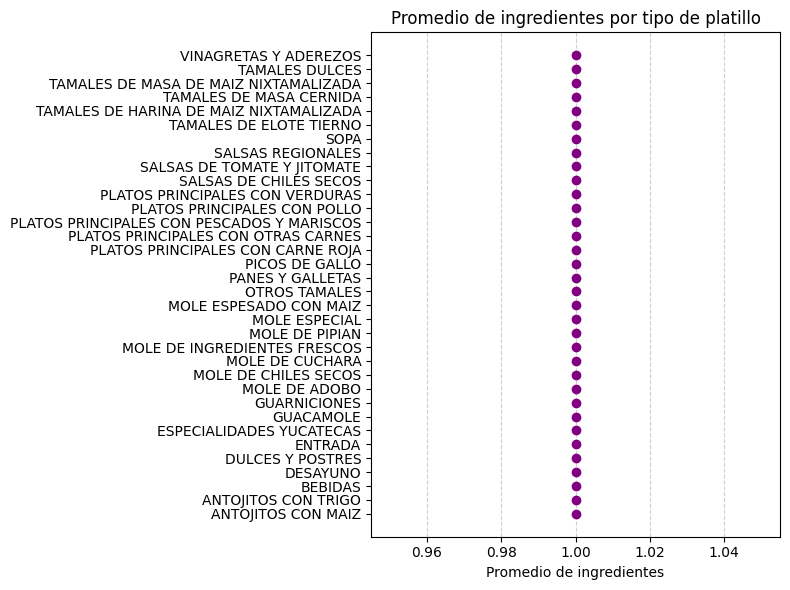

In [24]:
import matplotlib.pyplot as plt

ingredientes_por_tipo = df_expanded.groupby('TIPO')['Ingrediente'].count() / df_expanded.groupby('TIPO').size()
ingredientes_por_tipo = ingredientes_por_tipo.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.plot(ingredientes_por_tipo.values, ingredientes_por_tipo.index, 'o', color='purple')
plt.title('Promedio de ingredientes por tipo de platillo')
plt.xlabel('Promedio de ingredientes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [23]:
df

,NOMBRE DEL PLATILLO,ORIGEN,RENDIMIENTO (PERSONAS),PREPARACIÓN (MIN),COCCIÓN (MIN),REPOSO (MIN),REFRIGERACIÓN (MIN),CONGELACIÓN (MIN),DIFICULTAD,COSTO,INGREDIENTES,TIPO,Epoca,Categoría,Ingredientes_lista
0,ABULON CON PICO DE GALLO DE MANDARINA,BAJA CALIFORNIA SUR,2,4,3,0,0,0,2,3,"ABULON, PICO DE GALLO, MANDARINA, CHILE SERRANO",ENTRADA,México Contemporáneo (1940 - Actualidad),Pescados y mariscos,"[ABULON, PICO DE GALLO, MANDARINA, CHILE SERRANO]"
1,ADEREZO A LAS HIERBAS,YUCATAN,4,5,0,0,0,0,1,1,"LIMON, ACEITE DE OLIVA, YOGUR, CILANTRO, ALBAH...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[LIMON, ACEITE DE OLIVA, YOGUR, CILANTRO, ALBA..."
2,ADEREZO CON CHILES CUARESMEÑOS,JALISCO,4,5,0,0,0,0,1,1,"LIMON, ACEITE DE OLIVA, YOGUR, CHILE CUARESMEÑ...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[LIMON, ACEITE DE OLIVA, YOGUR, CHILE CUARESME..."
3,ADEREZO DE PIÑA,VERACRUZ,4,5,0,0,0,0,1,1,"LIMON, ACEITE DE OLIVA, YOGUR, PIÑA, CEBOLLIN,...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[LIMON, ACEITE DE OLIVA, YOGUR, PIÑA, CEBOLLIN..."
4,ADOBO,GUERRERO,8,10,30,0,0,0,3,2,"CHILE ANCHO, CHILE GUAJILLO, AJO, CEBOLLA, VIN...",MOLE DE ADOBO,Conquista y Virreinato (1521 – 1821),Moles y adobos,"[CHILE ANCHO, CHILE GUAJILLO, AJO, CEBOLLA, VI..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,VINAGRETA DE CITRICOS,VERACRUZ,4,5,0,0,0,0,1,1,"VINAGRE DE MANZANA, NARANJA, TORONJA, LIMON, M...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[VINAGRE DE MANZANA, NARANJA, TORONJA, LIMON, ..."
455,VINAGRETA DE GUAYABA,MICHOACÁN,4,5,0,0,0,0,1,1,"GUAYABA, VINAGRE DE MANZANA, CANELA, ACEITE DE...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[GUAYABA, VINAGRE DE MANZANA, CANELA, ACEITE D..."
456,VINAGRETA DE HIERBAS,OAXACA,4,5,0,0,0,0,1,1,"VINAGRE DE MANZANA, PEREJIL, ALBAHACA, TOMILLO...",VINAGRETAS Y ADEREZOS,México Contemporáneo (1940 - Actualidad),Salsas y aderezos,"[VINAGRE DE MANZANA, PEREJIL, ALBAHACA, TOMILL..."
457,VUELVE A LA VIDA,VERACRUZ,6,20,0,0,0,0,1,3,"OSTION, ALMEJA, CAMARON, JAIBA, JITOMATE, PERE...",ENTRADA,Revolución Mexicana (1910 - 1940),Pescados y mariscos,"[OSTION, ALMEJA, CAMARON, JAIBA, JITOMATE, PER..."
